## Pandas Data Frames

- What Is Pandas?
- Pandas vs Numpy 
- Pandas Data Frame Intro
- Pandas Data Frame fundamental operations
    - Creating
    - Selecting/indexing
    - Inserting rows/columns
    - Setting data
    - Filtering
    - Dropping rows/ columns
- Dealing with Missing values

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [ ]:
from IPython.display import display,Image, HTML

CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""
HTML('<style>{}</style>'.format(CSS))

# What is Pandas?


### - Pandas is an open-source library built on top of Numpy Package.
- https://github.com/pandas-dev/pandas
- https://github.com/pandas-dev/pandas/blob/059c8bac51e47d6eaaa3e36d6a293a22312925e6/pandas/core/frame.py

### - Enables working with tabular and labeled data easily and intuitively

### - Pandas data structures are:
    - Series
    - Index
    - Data Frame
    

## Quick refresher to Numpy Arrays
- contains Numerical ***Homogeneous*** Data
- may contain multi dimensional array elements.
- used for performing various numerical computations and processing of the multidimensional and single-dimensional array elements.

In [ ]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

two_dim_arr = np.random.randint(10, size=(3, 4))  # Two-dimensional array
three_dim_arr = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array


### A two dimensional Array example...

In [ ]:
print("Two Dimentional Array")
two_dim_arr

### What I mean by Homogeneous...

In [ ]:
print(two_dim_arr)

**two_dim_arr[0,0] = "Hello"**

In [ ]:
#printmd("***Oops....***")
two_dim_arr[0,0] = "Hello" 

### You can directly and simply form the DataFrame from the 2D array

In [ ]:
import pandas as pd

In [ ]:

print("Data Frame formed by 2D Array")
#printmd("***df=pd.DataFrame(two_dim_arr)***")
df=pd.DataFrame(two_dim_arr)
df

### Pandas Data Frame is Heterogeneous!
**df.iloc[0,0]="Hello"**

In [ ]:
df.iloc[0,0]="Hello"

In [ ]:
df

### Pandas Data Frame labels the data with Indices and Columns labels
pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

In [ ]:
np.random.randint(10,size=(3,2))

In [ ]:
##np.random.seed(0)
foo_df = pd.DataFrame(np.random.randint(10,size=(3,2)),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c']
                 )

In [ ]:
foo_df

### Pandas DataFrame is relevant for statistical observations/data points with various types of variables (categorical, etc) 

In [ ]:
Image("res/Tidy_census.png")

### It's intuitive...  Look how convenient it is

In [ ]:
people_df= pd.read_csv("data/people.csv")
people_df

In [ ]:
Image('res/excel-to-pandas.png')

source: https://jalammar.github.io/

### Describing the Data Frame...
- df.Info()
- df.count())
- df.describe())
- df.mean())

In [21]:
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [22]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     7 non-null      object
 1   age      7 non-null      int64 
 2   country  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [24]:
people_df['age'].describe()

count     7.000000
mean     20.714286
std       8.807464
min       2.000000
25%      21.000000
50%      23.000000
75%      24.000000
max      30.000000
Name: age, dtype: float64

In [25]:
people_df.count()

name       7
age        7
country    7
dtype: int64

In [26]:
x=[1,3,4,50]
print(np.median(x))
print(np.mean(x))

3.5
14.5


In [ ]:
#print(df,"\n")
people_df.info()
#print("df.count()  \n",df.count())
#print("\n df.describe() \n",df.describe())
#print("\n df.mean() \n",df.mean())

### Pandas Data Frame operations

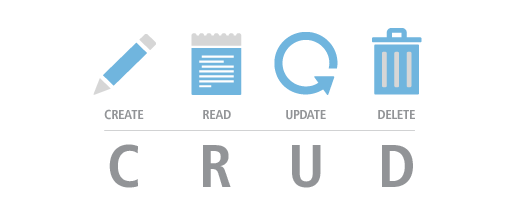

In [27]:
Image("res/CRUD.png")

### Data Frame creation
You can create/form a Data Frame from:
- Dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Structured or record ndarray

- A Series

- Another DataFrame

#### Here is an example...

In [55]:
names = ['Gen', 'Yan', 'Ira', 'Kaan']
food = ['dumpling', 'pierogi', 'pasta', 'cag']
food_dict = {'name':names, 'fav_food': food}

In [56]:
food_dict

{'name': ['Gen', 'Yan', 'Ira', 'Kaan'],
 'fav_food': ['dumpling', 'pierogi', 'pasta', 'cag']}

In [57]:
food_df = pd.DataFrame(food_dict)

In [58]:
food_df

,name,fav_food
0,Gen,dumpling
1,Yan,pierogi
2,Ira,pasta
3,Kaan,cag


In [59]:
names_2 = ['Anas', 'Bryan']
food_2 = ['biriyani', 'irish stew']
food_dict_2  =  {'name':names_2,'fav_food':food_2}
food_df2 = pd.DataFrame(food_dict_2)
food_df2

,name,fav_food
0,Anas,biriyani
1,Bryan,irish stew


In [60]:
df = pd.concat([food_df,food_df2])
df

,name,fav_food
0,Gen,dumpling
1,Yan,pierogi
2,Ira,pasta
3,Kaan,cag
0,Anas,biriyani
1,Bryan,irish stew


In [61]:
df.reset_index(drop=True, inplace = True)

In [62]:
print('example_df = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}\n')

example_dict = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}

example_dict

example_df = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}



{'col1': [1.0, 2.0, 3.0, 4.0], 'col2': [4.0, 3.0, 2.0, 1.0]}

In [ ]:
df=pd.DataFrame(example_dict,index =['a','b','c','d'])

In [ ]:
df

#### creating Index for the Data frame...

In [ ]:
df=pd.DataFrame(dic)
df

In [ ]:
print('dic = {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}\n')

dict2= {"col1": [1.0, 2.0, 3.0, 4.0], "col2": [4.0, 3.0, 2.0, 1.0]}

dict2

In [ ]:
df2=pd.DataFrame(dic2)
df2

In [ ]:
df3 = pd.concat([df,df2], axis=0)

In [ ]:
df3.reset_index()

### Creating a Data frame from Pandas Series objects.. 

In [ ]:
d = {
       "apples": [3, 2, 0,1],
        "oranges": [0, 3, 7, 2],
    }

pd.DataFrame(d)

In [ ]:
Image("res/series-and-dataframe.width-1200.png")

source: https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png

### Data Frame Selection / Indexing

In [91]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]
students_df = pd.DataFrame(data=data, index=row_labels)
students_df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [64]:
students_df.index

Int64Index([101, 102, 103, 104, 105, 106, 107], dtype='int64')

In [65]:
students_df.drop(105)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [ ]:
students_df

In [ ]:
students_df.reset_index(drop=True)

In [66]:
students_df.set_index('name')

,city,age,py-score
name,,,
Xavier,Mexico City,41,88.0
Ann,Toronto,28,79.0
Jana,Prague,33,81.0
Yi,Shanghai,34,80.0
Robin,Manchester,38,68.0
Amal,Cairo,31,61.0
Nori,Osaka,37,84.0


## Source: https://realpython.com/

### data Selection

In [92]:
students_df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [73]:
students_df.iloc[4,1]

'Manchester'

In [ ]:
students_df.loc[[101],["age"]]

In [ ]:
students_df

### Selecting by Label
- .loc[]  function

In [ ]:
students_df

In [ ]:
#print("students_df.loc[:, 'city']")
#students_df.loc[:, 'city']

In [ ]:
print("students_df.loc[102:106, ['name', 'city']]")
students_df.loc[102:106, ['name', 'city']]

In [ ]:
#print('df["city"]')
cities = students_df[["name","city"]]
cities

In [ ]:
print("df.city")
students_df.city

### Selecting by Position
- .iloc[]

In [74]:
students_df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [75]:
students_df.iloc[0,1]

'Mexico City'

In [76]:
print("students_df.iloc[1:6, [0, 1]]")
students_df.iloc[1:6, [0, 1]]

students_df.iloc[1:6, [0, 1]]


,name,city
102,Ann,Toronto
103,Jana,Prague
104,Yi,Shanghai
105,Robin,Manchester
106,Amal,Cairo


### Hmm.. Can you tell what is the difference between loc and iloc?

### Setting/ Updating data

#### let us first update the Data frame index..

In [78]:
students_df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [94]:
students_df.index = list(np.arange(0, 7))
students_df

,name,city,age,py-score
0,Xavier,Mexico City,41,88.0
1,Ann,Toronto,28,79.0
2,Jana,Prague,33,81.0
3,Yi,Shanghai,34,80.0
4,Robin,Manchester,38,68.0
5,Amal,Cairo,31,61.0
6,Nori,Osaka,37,84.0


In [95]:
students_df.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [96]:
students_df.loc[0,'py-score'] = 48
students_df

,name,city,age,py-score
0,Xavier,Mexico City,41,48.0
1,Ann,Toronto,28,79.0
2,Jana,Prague,33,81.0
3,Yi,Shanghai,34,80.0
4,Robin,Manchester,38,68.0
5,Amal,Cairo,31,61.0
6,Nori,Osaka,37,84.0


In [ ]:
students_df.loc[5, 'py-score'] 

In [ ]:
students_df.loc[5, 'py-score'] = 70
students_df

In [ ]:
students_df.loc[:,"py-score"]=90 
students_df

In [ ]:
students_df.iloc[:, -1] = [88.0, 90, 81.0, 80.0, 68.0, 61.0]
students_df

In [ ]:
students_df

In [ ]:
students_df.info()

In [ ]:
students_df["py-score"] =  students_df["py-score"]*1.5

In [ ]:
students_df

In [ ]:
students_df["py-score"]=list(map(lambda x: x+10,students_df["py-score"]))

In [ ]:
students_df["py-score"] =  students_df["py-score"]*10


In [ ]:
students_df

In [ ]:
students_df

In [ ]:
type(students_df[["age"]])

### Inserting/deleting rows

In [ ]:
students_df

In [ ]:
name = ['Juan', 'Monika', 'Juliette']
city = ['Berlin','Paris', 'Paris']
age = [30,20,25]

new_students = { 'name' : name, 'city':city, 'age':age}

In [ ]:
new_df = pd.DataFrame(new_students)
new_df

In [ ]:
df = pd.concat([students_df,new_df])

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

In [ ]:
students_df  = students_df[['name', 'city', 'age', 'py-score']]
students_df

In [ ]:
Ronald = pd.Series(data=['Ronald', 'Berlin', 34, 79],
                 index=students_df.columns[0:4])
students_df= students_df.append(Ronald, ignore_index=True)
students_df

In [ ]:
students_df.iloc[6,:]

In [98]:
students_df['country'] = ['Mexico', 'Canada', 'Czech Republic', 'China', 'UK', 'Egypt', 'Japan']

In [101]:
students_df.drop('country', axis = 1)

,name,city,age,py-score
0,Xavier,Mexico City,41,48.0
1,Ann,Toronto,28,79.0
2,Jana,Prague,33,81.0
3,Yi,Shanghai,34,80.0
4,Robin,Manchester,38,68.0
5,Amal,Cairo,31,61.0
6,Nori,Osaka,37,84.0


### Inserting/Deleting columns

In [ ]:
#print('df[js-score] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])')
students_df['js-score'] =[71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80]
students_df

In [ ]:
students_df['py-score-updated'] = students_df['py-score'] * 10 

In [ ]:
students_df

### Inserting in a specific location

In [102]:
#print('df.insert(loc=4, column=js-score,value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))')
students_df.insert(loc=4, column='django-score',
          value=np.array([70, 74, 78, 56, 66, 78, 81.0]))
students_df

,name,city,age,py-score,django-score,country
0,Xavier,Mexico City,41,48.0,70.0,Mexico
1,Ann,Toronto,28,79.0,74.0,Canada
2,Jana,Prague,33,81.0,78.0,Czech Republic
3,Yi,Shanghai,34,80.0,56.0,China
4,Robin,Manchester,38,68.0,66.0,UK
5,Amal,Cairo,31,61.0,78.0,Egypt
6,Nori,Osaka,37,84.0,81.0,Japan


### dropping specific column

In [ ]:
## axis= 0 dropping by row,  axis=1 dropping by column
students_df.drop(labels=['django-score'], axis=1)

### Filtering/Boolean Indexing

In [103]:
students_df["py-score"] >= 75

0    False
1     True
2     True
3     True
4    False
5    False
6     True
Name: py-score, dtype: bool

In [104]:
very_good_students_filter=students_df[students_df["py-score"]>=75]

In [105]:
very_good_students_filter

,name,city,age,py-score,django-score,country
1,Ann,Toronto,28,79.0,74.0,Canada
2,Jana,Prague,33,81.0,78.0,Czech Republic
3,Yi,Shanghai,34,80.0,56.0,China
6,Nori,Osaka,37,84.0,81.0,Japan


### Creating powerful filters with Logical operators AND, OR, NOT, XOR

In [107]:
#print('df[(df[py-score] >= 80) & (df[js-score] >= 80)]')
students_df[(students_df['py-score'] >= 70) & (students_df['django-score'] >= 80)] #or 

,name,city,age,py-score,django-score,country
6,Nori,Osaka,37,84.0,81.0,Japan


## using value counts  function

In [108]:
people_df=pd.read_csv("data/people.csv")
people_df

,name,age,country
0,Pol,22,ES
1,Javi,20,ES
2,Maria,23,AR
3,Anna,24,FR
4,Anna,24,UK
5,Javi,30,MA
6,Dog,2,XX


In [112]:
people_df['age'].nunique()

6

In [113]:
people_df['numpy_score'] = [75,80,75,78,98,85,74]

In [114]:
people_df

,name,age,country,numpy_score
0,Pol,22,ES,75
1,Javi,20,ES,80
2,Maria,23,AR,75
3,Anna,24,FR,78
4,Anna,24,UK,98
5,Javi,30,MA,85
6,Dog,2,XX,74


### saving our df to csv

In [118]:
people_df.to_csv('people_numpy.csv')

In [119]:
people_df

,name,age,country,numpy_score
0,Pol,22,ES,75
1,Javi,20,ES,80
2,Maria,23,AR,75
3,Anna,24,FR,78
4,Anna,24,UK,98
5,Javi,30,MA,85
6,Dog,2,XX,74


In [121]:
people_df["py-score"]=list(map(lambda x: x+10,students_df["py-score"]))

In [122]:
people_df

,name,age,country,numpy_score,py-score
0,Pol,22,ES,75,58.0
1,Javi,20,ES,80,89.0
2,Maria,23,AR,75,91.0
3,Anna,24,FR,78,90.0
4,Anna,24,UK,98,78.0
5,Javi,30,MA,85,71.0
6,Dog,2,XX,74,94.0


In [125]:
people_df['modified_names'] = list(map(lambda x: 'John' if x.endswith('a') else x, people_df['name']))

In [126]:
people_df

,name,age,country,numpy_score,py-score,modified_names
0,Pol,22,ES,75,58.0,Pol
1,Javi,20,ES,80,89.0,Javi
2,Maria,23,AR,75,91.0,John
3,Anna,24,FR,78,90.0,John
4,Anna,24,UK,98,78.0,John
5,Javi,30,MA,85,71.0,Javi
6,Dog,2,XX,74,94.0,Dog
